## _**Sales Data Analysis**_

#### **Importing Necessary Libraries**

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
sales_df = pd.read_csv('Sales Data.csv')

sales_df

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
...,...,...,...,...,...,...,...,...,...,...,...
185945,13617,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215",6,2.99,Boston,19
185946,13618,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001",6,149.99,New York City,19
185947,13619,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016",6,11.95,San Francisco,18
185948,13620,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016",6,11.95,San Francisco,18


### **Data Exploration**

To get an initial understanding of the data, examining the first(5) rows of the dataset.

In [31]:
sales_df.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


In [32]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


##### Seing all the columns in the dataset.

In [33]:
sales_df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

##### Calculating summary statistics for numerical variables.

In [34]:
sales_df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


##### Checking the data types of the columns.

In [35]:
sales_df.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

### **Data Cleaning and Preprocessing**

##### Checking for missing values.

In [36]:
sales_df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

##### Checking for duplicated values.

In [37]:
sales_df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
185945    False
185946    False
185947    False
185948    False
185949    False
Length: 185950, dtype: bool

##### Dropping the column 'Unnamed:0'.

In [38]:
sales_df = sales_df.drop(columns=['Unnamed: 0'])

##### Renaming Columns

In [39]:
sales_df = sales_df.rename(columns={
    'Order ID': 'Order ID',
    'Product': 'Product',
    'Quantity Ordered': 'Quantity Ordered',
    'Price Each': 'Price Each',
    'Order Date': 'Order Date',
    'Purchase Address': 'Purchase Address',
    'Month': 'Order Month',
    'Sales': 'Total Sales',
    'City': 'Purchase City',
    'Hour': 'Order Hour',
})

##### Checking the columns to confirm the dropped column and the name 'renaming'.

In [40]:
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Order Month', 'Total Sales', 'Purchase City',
       'Order Hour'],
      dtype='object')

##### Changing the data type of the 'Order Date' column to Datetime.

In [41]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])

### **Exploratory Data Analysis(EDA)**

##### Sales Trends Over Time

In [42]:
sales_df['Month'] = sales_df['Order Date'].dt.month

monthly_sales = sales_df.groupby('Month')['Total Sales'].sum()

monthly_sales

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

In [43]:
sales_df['Product']

0             Macbook Pro Laptop
1             LG Washing Machine
2           USB-C Charging Cable
3               27in FHD Monitor
4           USB-C Charging Cable
                   ...          
185945    AAA Batteries (4-pack)
185946          27in FHD Monitor
185947      USB-C Charging Cable
185948      USB-C Charging Cable
185949    AAA Batteries (4-pack)
Name: Product, Length: 185950, dtype: object

##### Aggregating the 'Product' and 'Total Sales' to see the top selling products.

In [62]:
product_sales = sales_df.groupby('Product')['Total Sales'].sum().reset_index()

top_selling_products = product_sales.sort_values(by='Total Sales', ascending=False)

top_10_products = top_selling_products.head(10)

print(top_10_products)

                       Product  Total Sales
13          Macbook Pro Laptop   8037600.00
18                      iPhone   4794300.00
14             ThinkPad Laptop   4129958.70
9                 Google Phone   3319200.00
1       27in 4K Gaming Monitor   2435097.56
3       34in Ultrawide Monitor   2355558.01
6     Apple Airpods Headphones   2349150.00
8                Flatscreen TV   1445700.00
7   Bose SoundSport Headphones   1345565.43
2             27in FHD Monitor   1132424.50


### **Data Visualization**

##### Heatmap to see the correlation.

C:\Users\dulce\AppData\Local\Temp\ipykernel_29712\2935488050.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sales_df.corr()


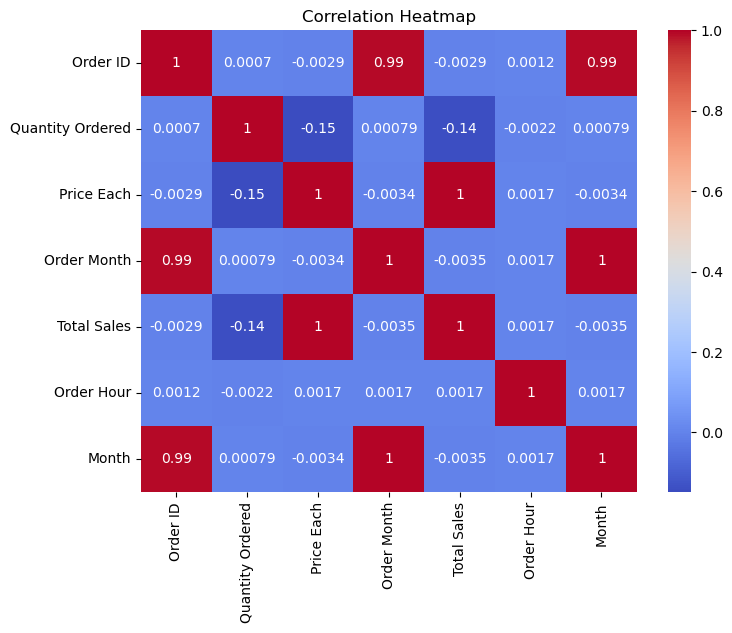

In [46]:
correlation_matrix = sales_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##### Sales Trends Over Time.

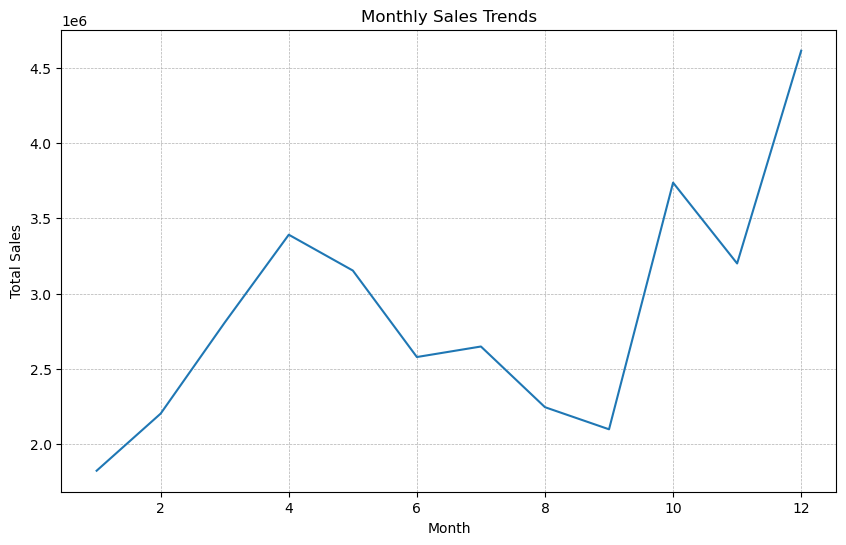

In [47]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trends')

plt.grid(False)
plt.grid(linestyle='--', linewidth=0.5)

plt.show()

Top 10 Best-Selling Products

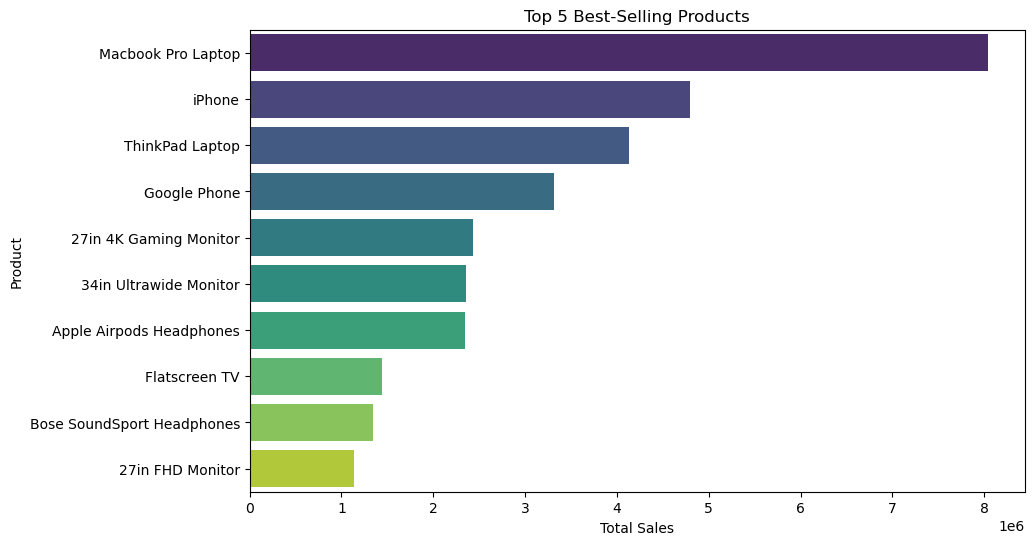

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Total Sales', y='Product', data=top_10_products, palette='viridis')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Top 10 Best-Selling Products')
plt.show();

Total Sales by City

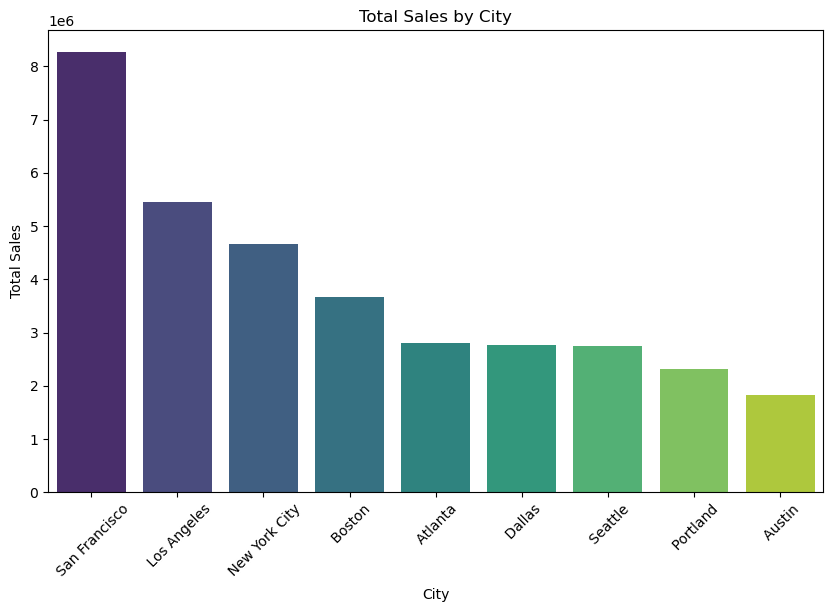

In [68]:
plt.figure(figsize=(10, 6))
city_sales = sales_df.groupby('Purchase City')['Total Sales'].sum().sort_values(ascending=False)
sns.barplot(x=city_sales.index, y=city_sales.values, palette='viridis')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(rotation=45)
plt.show()

Hourly Sales Trends

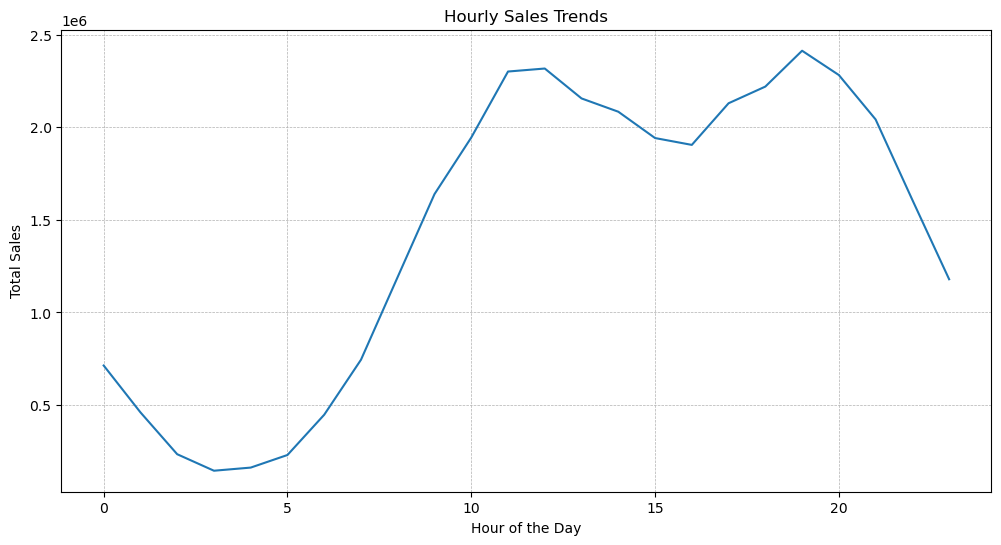

In [70]:
sales_df['Hour'] = sales_df['Order Date'].dt.hour
hourly_sales = sales_df.groupby('Hour')['Total Sales'].sum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_sales.index, y=hourly_sales.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.title('Hourly Sales Trends')

plt.grid(False)

plt.grid(linestyle='--', linewidth=0.5)

plt.show()